In [27]:
# friend's script (wesley from UWA)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [28]:

dfORE = pd.read_csv("ORE.csv", index_col=0)
dfSHEEP = pd.read_csv("SHEEP.csv", index_col=0)
dfVP = pd.read_csv("VP.csv", index_col=0)
dfWHEAT = pd.read_csv("WHEAT.csv", index_col=0)

In [29]:
dfORE['MidPrice'] = (dfORE['Bids'] + dfORE['Asks']) / 2
dfSHEEP['MidPrice'] = (dfSHEEP['Bids'] + dfSHEEP['Asks']) / 2
dfVP['MidPrice'] = (dfVP['Bids'] + dfVP['Asks']) / 2
dfWHEAT['MidPrice'] = (dfWHEAT['Bids'] + dfWHEAT['Asks']) / 2


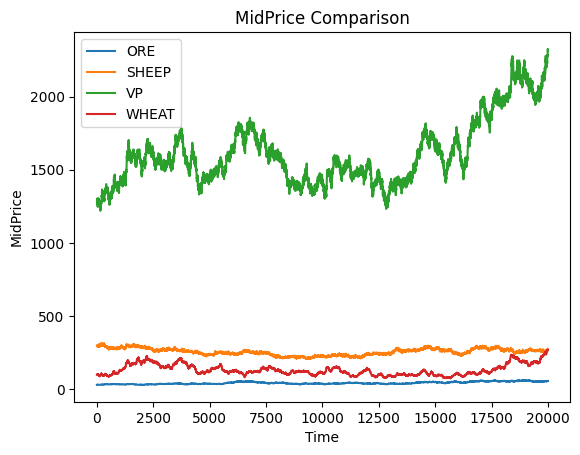

In [30]:
dfORE['MidPrice'].plot(label='ORE')
dfSHEEP['MidPrice'].plot(label='SHEEP')
dfVP['MidPrice'].plot(label='VP')
dfWHEAT['MidPrice'].plot(label='WHEAT')

plt.legend()
plt.title("MidPrice Comparison")
plt.xlabel("Time")
plt.ylabel("MidPrice")
plt.show()


In [31]:
merged_df = pd.DataFrame({
    'ORE': dfORE['MidPrice'],
    'SHEEP': dfSHEEP['MidPrice'],
    'VP': dfVP['MidPrice'],
    'WHEAT': dfWHEAT['MidPrice']
}).dropna()  # Drop rows with missing values, if any
print(merged_df.corr())

            ORE     SHEEP        VP     WHEAT
ORE    1.000000  0.096825  0.845854  0.109674
SHEEP  0.096825  1.000000  0.292077  0.256734
VP     0.845854  0.292077  1.000000  0.592964
WHEAT  0.109674  0.256734  0.592964  1.000000


In [32]:
from sklearn.linear_model import LinearRegression

X = merged_df[['SHEEP', 'VP', 'WHEAT']]  # Predictors
y = merged_df['ORE']  # Target

model = LinearRegression()
model.fit(X, y)

print("R² score:", model.score(X, y))  # How well the model fits
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
# import seaborn as sns
# sns.pairplot(merged_df)
# plt.show()

R² score: 0.963329076975874
Coefficients: [-0.03727556  0.04282461 -0.12264661]
Intercept: -0.5394605760170705


In [54]:
from sklearn.linear_model import LinearRegression

X = merged_df[['SHEEP','ORE', 'WHEAT']]  # Predictors
y = merged_df['VP']  # Target

model = LinearRegression()
model.fit(X, y)

print("R² score:", model.score(X, y))  # How well the model fits
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

R² score: 0.9765908102537697
Coefficients: [ 0.89205968 22.4798756   2.88036676]
Intercept: 42.15015333713495


In [34]:
import itertools
import pandas as pd
from sklearn.linear_model import LinearRegression

# Define the predictors and target
predictors = ['SHEEP', 'ORE', 'WHEAT']
target = 'VP'

# Function to generate all combinations of predictors
def get_combinations(predictors):
    return [list(comb) for i in range(1, len(predictors) + 1) for comb in itertools.combinations(predictors, i)]

# Generate all combinations of predictors
combinations = get_combinations(predictors)

# Dictionary to store R² scores and coefficients for each combination
results = {}

# Fit linear regression for each combination of predictors and evaluate
for combo in combinations:
    X = merged_df[combo]  # Select the predictors for the current combination
    y = merged_df[target]  # Target
    
    # Create and fit the model
    model = LinearRegression()
    model.fit(X, y)
    
    # Store results
    r_squared = model.score(X, y)
    results[tuple(combo)] = {
        'R² Score': r_squared,
        'Coefficients': model.coef_,
        'Intercept': model.intercept_
    }

# Display the results
for combo, result in results.items():
    print(f"Combination: {combo}")
    print(f"R² Score: {result['R² Score']}")
    print(f"Coefficients: {result['Coefficients']}")
    print(f"Intercept: {result['Intercept']}")
    print("-" * 40)

# Optionally, you can sort the results by R² score to see the best model first
sorted_results = sorted(results.items(), key=lambda x: x[1]['R² Score'], reverse=True)

# Display sorted results
print("\nBest combinations based on R² score:")
for combo, result in sorted_results:
    print(f"Combination: {combo} - R² Score: {result['R² Score']}")





Combination: ('SHEEP',)
R² Score: 0.08530872424017477
Coefficients: [2.82956245]
Intercept: 886.296749096033
----------------------------------------
Combination: ('ORE',)
R² Score: 0.7154691859470704
Coefficients: [24.25567816]
Intercept: 573.3590050365749
----------------------------------------
Combination: ('WHEAT',)
R² Score: 0.35160669169375613
Coefficients: [3.53359806]
Intercept: 1145.8586329002903
----------------------------------------
Combination: ('SHEEP', 'ORE')
R² Score: 0.7600615836315152
Coefficients: [ 2.0554094  23.66659003]
Intercept: 72.43063204149098
----------------------------------------
Combination: ('SHEEP', 'WHEAT')
R² Score: 0.37254253442211427
Coefficients: [1.45035385 3.30455169]
Intercept: 804.7372736752864
----------------------------------------
Combination: ('ORE', 'WHEAT')
R² Score: 0.9687111835975846
Coefficients: [22.66340138  3.01706197]
Intercept: 244.66366314391416
----------------------------------------
Combination: ('SHEEP', 'ORE', 'WHEAT')
R

In [35]:
import itertools
import pandas as pd
from sklearn.linear_model import LinearRegression

# Define the predictors and target
predictors = ['SHEEP', 'VP', 'WHEAT']
target = 'ORE'

# Function to generate all combinations of predictors
def get_combinations(predictors):
    return [list(comb) for i in range(1, len(predictors) + 1) for comb in itertools.combinations(predictors, i)]

# Generate all combinations of predictors
combinations = get_combinations(predictors)

# Dictionary to store R² scores and coefficients for each combination
results = {}

# Fit linear regression for each combination of predictors and evaluate
for combo in combinations:
    X = merged_df[combo]  # Select the predictors for the current combination
    y = merged_df[target]  # Target
    
    # Create and fit the model
    model = LinearRegression()
    model.fit(X, y)
    
    # Store results
    r_squared = model.score(X, y)
    results[tuple(combo)] = {
        'R² Score': r_squared,
        'Coefficients': model.coef_,
        'Intercept': model.intercept_
    }

# Display the results
for combo, result in results.items():
    print(f"Combination: {combo}")
    print(f"R² Score: {result['R² Score']}")
    print(f"Coefficients: {result['Coefficients']}")
    print(f"Intercept: {result['Intercept']}")
    print("-" * 40)

# Optionally, you can sort the results by R² score to see the best model first
sorted_results = sorted(results.items(), key=lambda x: x[1]['R² Score'], reverse=True)

# Display sorted results
print("\nBest combinations based on R² score:")
for combo, result in sorted_results:
    print(f"Combination: {combo} - R² Score: {result['R² Score']}")

Combination: ('SHEEP',)
R² Score: 0.009375038725686458
Coefficients: [0.0327108]
Intercept: 34.3888205252979
----------------------------------------
Combination: ('VP',)
R² Score: 0.7154691859470704
Coefficients: [0.02949698]
Intercept: -4.7453264013280645
----------------------------------------
Combination: ('WHEAT',)
R² Score: 0.012028456981637015
Coefficients: [0.02279164]
Intercept: 39.7643299307245
----------------------------------------
Combination: ('SHEEP', 'VP')
R² Score: 0.7401429414249039
Coefficients: [-0.0554862   0.03116984]
Intercept: 6.763096728067424
----------------------------------------
Combination: ('SHEEP', 'WHEAT')
R² Score: 0.01707642722554159
Coefficients: [0.02483529 0.01886954]
Intercept: 33.92310232996991
----------------------------------------
Combination: ('VP', 'WHEAT')
R² Score: 0.952324523056749
Coefficients: [ 0.04199476 -0.12560096]
Intercept: -8.355727195135351
----------------------------------------
Combination: ('SHEEP', 'VP', 'WHEAT')
R² Sco

In [36]:
import itertools
import pandas as pd
from sklearn.linear_model import LinearRegression

# Define the predictors and target
predictors = ['VP', 'ORE', 'SHEEP']
target = 'WHEAT'

# Function to generate all combinations of predictors
def get_combinations(predictors):
    return [list(comb) for i in range(1, len(predictors) + 1) for comb in itertools.combinations(predictors, i)]

# Generate all combinations of predictors
combinations = get_combinations(predictors)

# Dictionary to store R² scores and coefficients for each combination
results = {}

# Fit linear regression for each combination of predictors and evaluate
for combo in combinations:
    X = merged_df[combo]  # Select the predictors for the current combination
    y = merged_df[target]  # Target
    
    # Create and fit the model
    model = LinearRegression()
    model.fit(X, y)
    
    # Store results
    r_squared = model.score(X, y)
    results[tuple(combo)] = {
        'R² Score': r_squared,
        'Coefficients': model.coef_,
        'Intercept': model.intercept_
    }

# Display the results
for combo, result in results.items():
    print(f"Combination: {combo}")
    print(f"R² Score: {result['R² Score']}")
    print(f"Coefficients: {result['Coefficients']}")
    print(f"Intercept: {result['Intercept']}")
    print("-" * 40)

# Optionally, you can sort the results by R² score to see the best model first
sorted_results = sorted(results.items(), key=lambda x: x[1]['R² Score'], reverse=True)

# Display sorted results
print("\nBest combinations based on R² score:")
for combo, result in sorted_results:
    print(f"Combination: {combo} - R² Score: {result['R² Score']}")

Combination: ('VP',)
R² Score: 0.35160669169375613
Coefficients: [0.09950387]
Intercept: -28.745009887080897
----------------------------------------
Combination: ('ORE',)
R² Score: 0.012028456981637126
Coefficients: [0.5277574]
Intercept: 108.94550580306208
----------------------------------------
Combination: ('SHEEP',)
R² Score: 0.06591236009088519
Coefficients: [0.41736633]
Intercept: 24.68095012806306
----------------------------------------
Combination: ('VP', 'ORE')
R² Score: 0.8913563709322458
Coefficients: [ 0.29500012 -6.62767059]
Intercept: -60.19547013885287
----------------------------------------
Combination: ('VP', 'SHEEP')
R² Score: 0.35923706861844296
Coefficients: [0.09502732 0.1484806 ]
Intercept: -59.541453064909035
----------------------------------------
Combination: ('ORE', 'SHEEP')
R² Score: 0.07317421204199992
Coefficients: [0.41200116 0.40388944]
Intercept: 10.512716344727963
----------------------------------------
Combination: ('VP', 'ORE', 'SHEEP')
R² Score

In [37]:
import itertools
import pandas as pd
from sklearn.linear_model import LinearRegression

# Define the predictors and target
predictors = ['VP', 'ORE', 'WHEAT']
target = 'SHEEP'

# Function to generate all combinations of predictors
def get_combinations(predictors):
    return [list(comb) for i in range(1, len(predictors) + 1) for comb in itertools.combinations(predictors, i)]

# Generate all combinations of predictors
combinations = get_combinations(predictors)

# Dictionary to store R² scores and coefficients for each combination
results = {}

# Fit linear regression for each combination of predictors and evaluate
for combo in combinations:
    X = merged_df[combo]  # Select the predictors for the current combination
    y = merged_df[target]  # Target
    
    # Create and fit the model
    model = LinearRegression()
    model.fit(X, y)
    
    # Store results
    r_squared = model.score(X, y)
    results[tuple(combo)] = {
        'R² Score': r_squared,
        'Coefficients': model.coef_,
        'Intercept': model.intercept_
    }

# Display the results
for combo, result in results.items():
    print(f"Combination: {combo}")
    print(f"R² Score: {result['R² Score']}")
    print(f"Coefficients: {result['Coefficients']}")
    print(f"Intercept: {result['Intercept']}")
    print("-" * 40)

# Optionally, you can sort the results by R² score to see the best model first
sorted_results = sorted(results.items(), key=lambda x: x[1]['R² Score'], reverse=True)

# Display sorted results
print("\nBest combinations based on R² score:")
for combo, result in sorted_results:
    print(f"Combination: {combo} - R² Score: {result['R² Score']}")

Combination: ('VP',)
R² Score: 0.08530872424017466
Coefficients: [0.03014909]
Intercept: 207.41055579085938
----------------------------------------
Combination: ('ORE',)
R² Score: 0.009375038725686569
Coefficients: [0.28660379]
Intercept: 243.71221224341704
----------------------------------------
Combination: ('WHEAT',)
R² Score: 0.06591236009088508
Coefficients: [0.15792448]
Intercept: 235.1987136353929
----------------------------------------
Combination: ('VP', 'ORE')
R² Score: 0.16462831902967634
Coefficients: [ 0.07624883 -1.56286327]
Intercept: 199.99425946228556
----------------------------------------
Combination: ('VP', 'WHEAT')
R² Score: 0.09607293033909625
Coefficients: [0.02226271 0.07925702]
Intercept: 209.68879973485676
----------------------------------------
Combination: ('ORE', 'WHEAT')
R² Score: 0.0706850143690182
Coefficients: [0.20573262 0.1532355 ]
Intercept: 227.0178937193907
----------------------------------------
Combination: ('VP', 'ORE', 'WHEAT')
R² Score: 

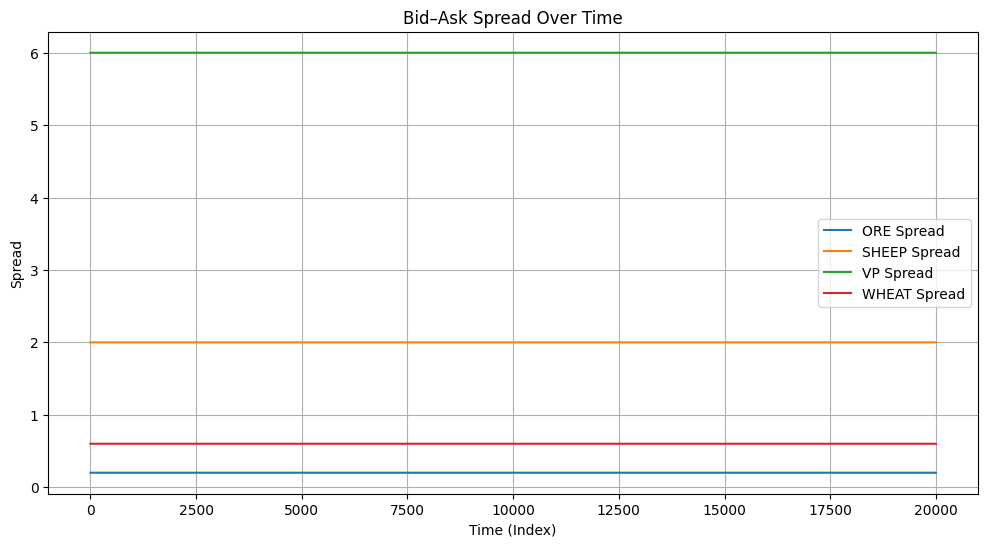

In [38]:
import matplotlib.pyplot as plt

# Calculate spread for each DataFrame
dfORE['Spread']   = dfORE['Asks']   - dfORE['Bids']
dfSHEEP['Spread'] = dfSHEEP['Asks'] - dfSHEEP['Bids']
dfVP['Spread']    = dfVP['Asks']    - dfVP['Bids']
dfWHEAT['Spread'] = dfWHEAT['Asks'] - dfWHEAT['Bids']

# Plot
plt.figure(figsize=(12, 6))
plt.plot(dfORE['Spread'],   label='ORE Spread')
plt.plot(dfSHEEP['Spread'], label='SHEEP Spread')
plt.plot(dfVP['Spread'],    label='VP Spread')
plt.plot(dfWHEAT['Spread'], label='WHEAT Spread')

plt.title('Bid–Ask Spread Over Time')
plt.xlabel('Time (Index)')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.show()


Train R² score: 0.9767193759339999
Test R² score: 0.9760501572530652
Coefficients: [ 0.89570217 22.46662078  2.88612807]
Intercept: 41.00806636657171


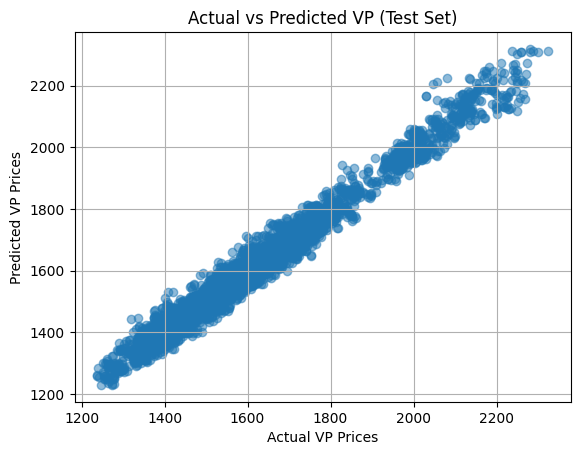

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Features and target
X = merged_df[['SHEEP', 'ORE', 'WHEAT']]
y = merged_df['VP']

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate on test set
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

print("Train R² score:", r2_train)
print("Test R² score:", r2_test)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Optional: Plot Actual vs Predicted on Test Set
y_pred_test = model.predict(X_test)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel('Actual VP Prices')
plt.ylabel('Predicted VP Prices')
plt.title('Actual vs Predicted VP (Test Set)')
plt.grid(True)
plt.show()


In [52]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import numpy as np

# Features and target
X = merged_df[['SHEEP', 'ORE', 'WHEAT']].values
y = merged_df['VP'].values

# Set up 3-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

r2_scores = []
coefficients_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Get the R² score for this fold
    r2 = model.score(X_test, y_test)
    r2_scores.append(r2)
    
    # Store the coefficients for this fold
    coefficients_list.append(model.coef_)

# Average the coefficients across all folds
average_coefficients = np.mean(coefficients_list, axis=0)

# Final results
average_r2 = np.mean(r2_scores)
print(f"R² scores for each fold: {r2_scores}")
print(f"Average R² score: {average_r2:.4f}")
print(f"Average coefficients (SHEEP, ORE, WHEAT): {average_coefficients}")


R² scores for each fold: [0.9758398257855996, 0.9767432829532132, 0.9771017734465354]
Average R² score: 0.9766
Average coefficients (SHEEP, ORE, WHEAT): [ 0.89201357 22.47981888  2.88034285]


In [214]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import numpy as np

# Features and target
X = merged_df[['SHEEP', 'ORE', 'WHEAT']].values
y = merged_df['VP'].values

# Set up 3-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []
coefficients_list = []
intercepts_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Get the R² score for this fold
    r2 = model.score(X_test, y_test)
    r2_scores.append(r2)
    
    # Store the coefficients and intercept for this fold
    coefficients_list.append(model.coef_)
    intercepts_list.append(model.intercept_)

# Average the coefficients and intercepts across all folds
average_coefficients = np.mean(coefficients_list, axis=0)
average_intercept = np.mean(intercepts_list)

# Final results
average_r2 = np.mean(r2_scores)
print(f"R² scores for each fold: {r2_scores}")
print(f"Average R² score: {average_r2}")
print(f"Average coefficients (SHEEP, ORE, WHEAT): {average_coefficients}")
print(f"Average intercept: {average_intercept}")


R² scores for each fold: [0.9760501572530652, 0.9756097974548554, 0.9770977988669226, 0.9765379021228078, 0.9774660988629076]
Average R² score: 0.9765523509121117
Average coefficients (SHEEP, ORE, WHEAT): [ 0.89204753 22.47974579  2.88036569]
Average intercept: 42.158591857180454
